In [18]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math as math
import pybinding as pb
from pybinding.repository import graphene
pb.pltutils.use_style()

## System_ImportantConstant

In [19]:
a = 3*graphene.a_cc # lattice length.
a_cc = graphene.a_cc # carbon-carbon bond length
t = graphene.t # hopping energy of graphene.
leng = 18*graphene.a_cc #lengh of supercell that I wanna make
m = 0.001 
plt.rcParams.update({'font.size': 15})


#Topological -> 위상 기하적
#넓은것과 좁은것이 또 합쳐저서 하나의 unit cel이 됨.
#상태에 따라서 에너지나 property가 많이 달라짐.
# LAPACK -> exact diag . must in small system.


## Armchair Graphene

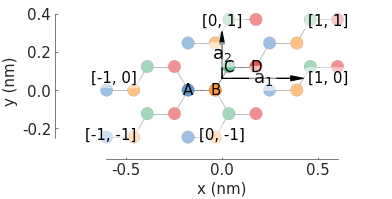

In [20]:
import math as math

def monolayer_graphene() :
    
    lat = pb.Lattice(a1=[a,0], a2 = [0,math.sqrt(3)*a_cc]) #lattice vector
    
    lat.add_sublattices(
        ('A',[-5/4*a_cc,0/4*a_cc]),
        ('B',[-1/4*a_cc,0/4*a_cc]),
        ('C',[1/4*a_cc,2*math.sqrt(3)/4*a_cc]),
        ('D',[5/4*a_cc,2*math.sqrt(3)/4*a_cc])
        )
                        
    lat.add_hoppings(
        ([0,0], 'A', 'B', t),
        ([0,0], 'B', 'C', t),
        ([0,0], 'C', 'D', t),
        ([-1,0],'A','D',t),
        ([0,-1],'B','C',t), 
        ([1,1],'D','A',t) 
    )
    
    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()

## Strtucture A

How many supercell you want to make?
3


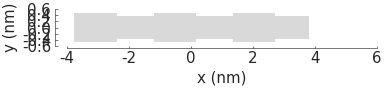

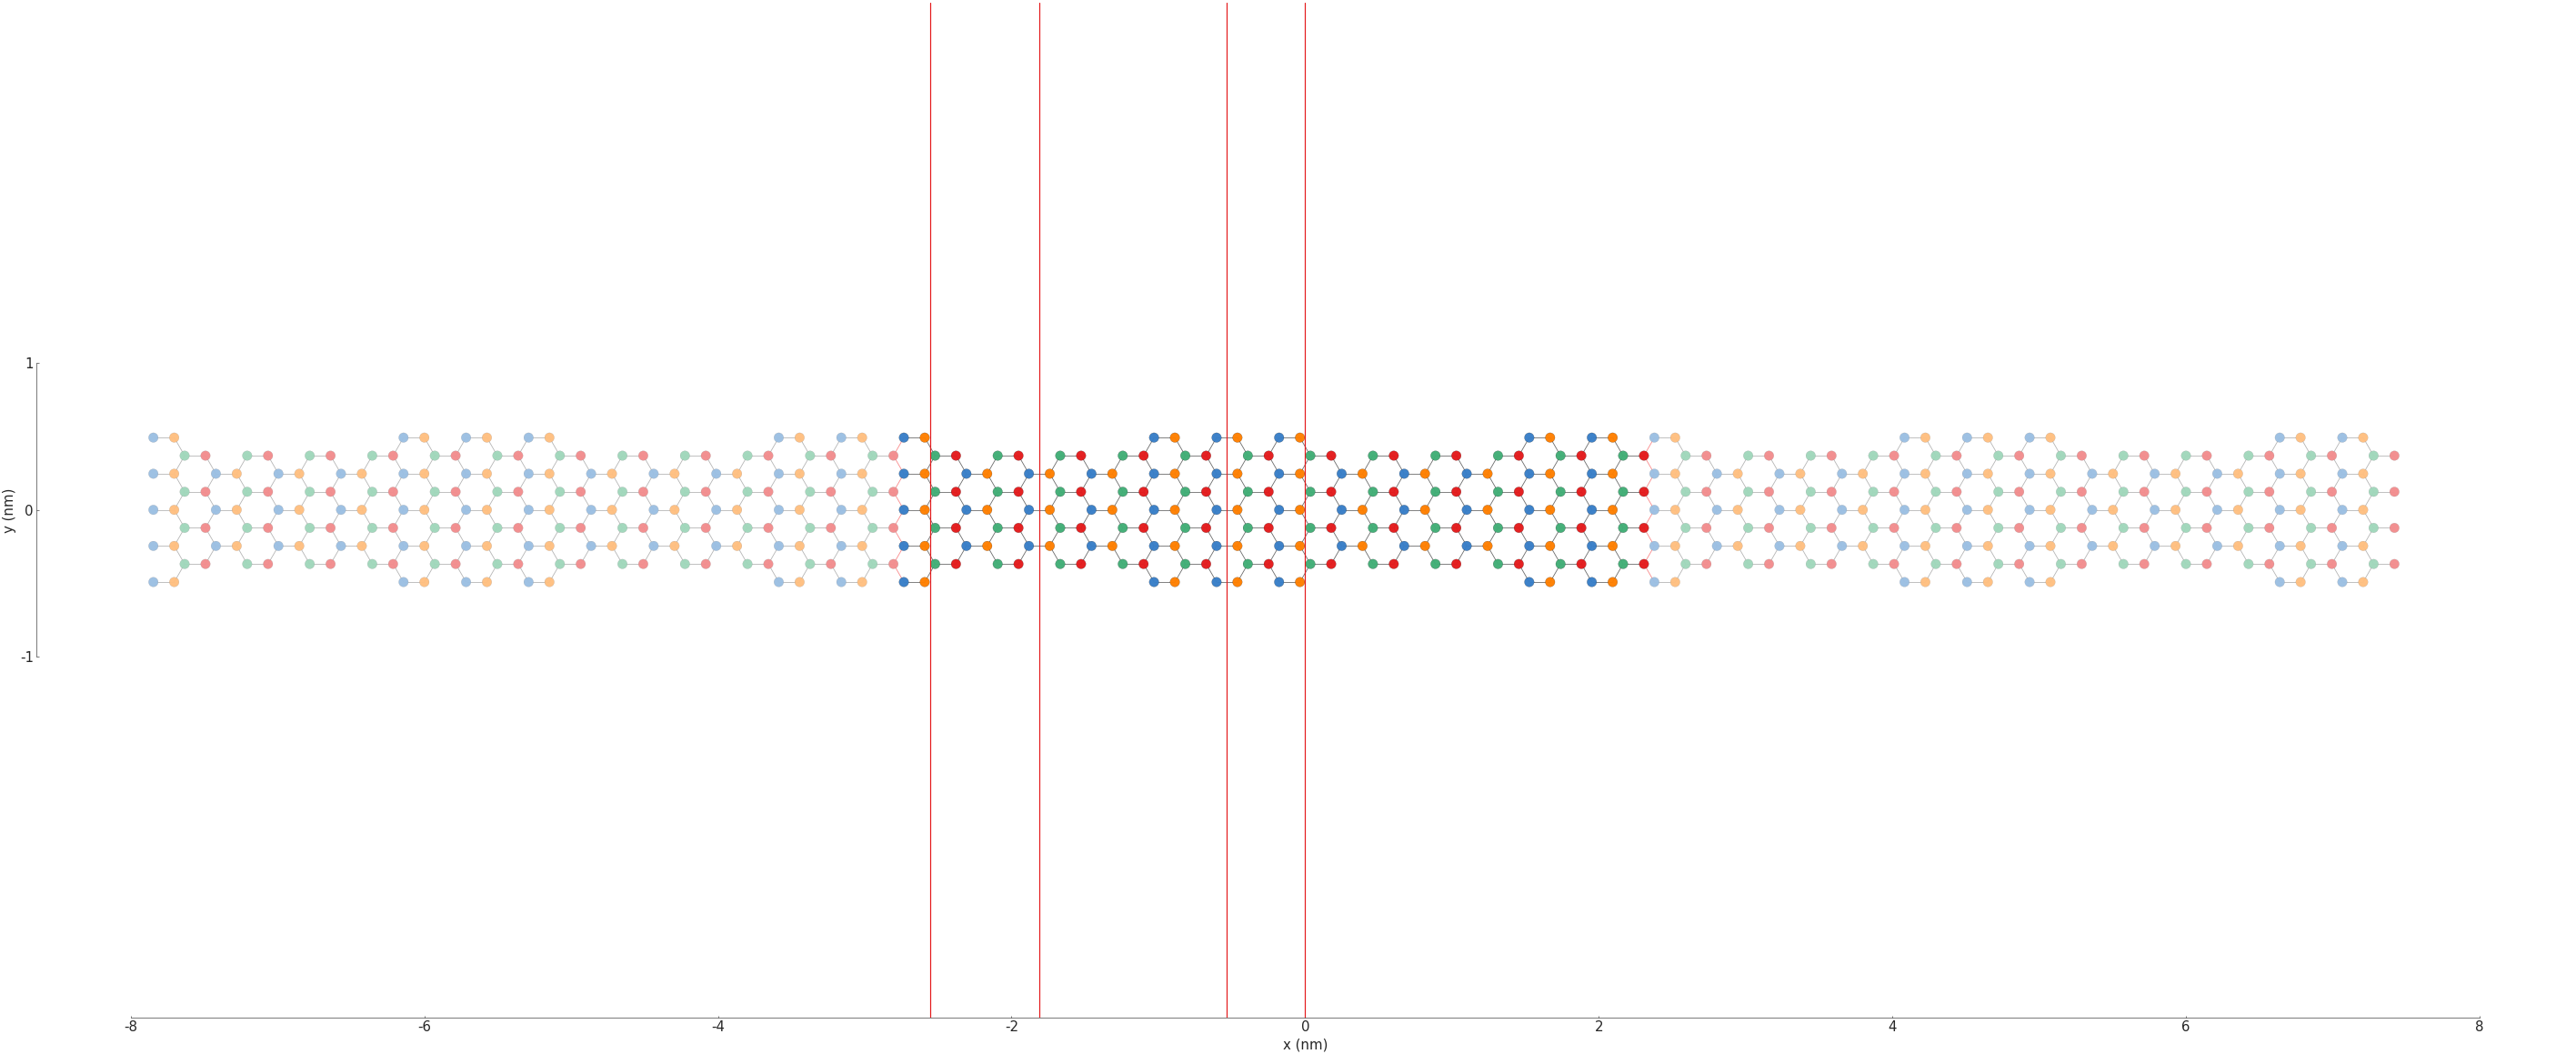

In [24]:
def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=1/2*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), -math.sqrt(3)*2*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_down -tr_rect_up

    return shape_1

supercell = shape(0)

print('How many supercell you want to make?')
inp = input() 


for i in range (0,int(inp)) :
    supercell += shape(i)
    
    
supercell.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_A = pb.Model(lattice, supercell, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
#arm_gra.shape.plot()

## Structure B

How many supercell you want to make? +1을 해주세요
21


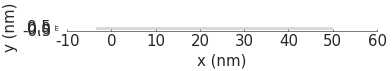

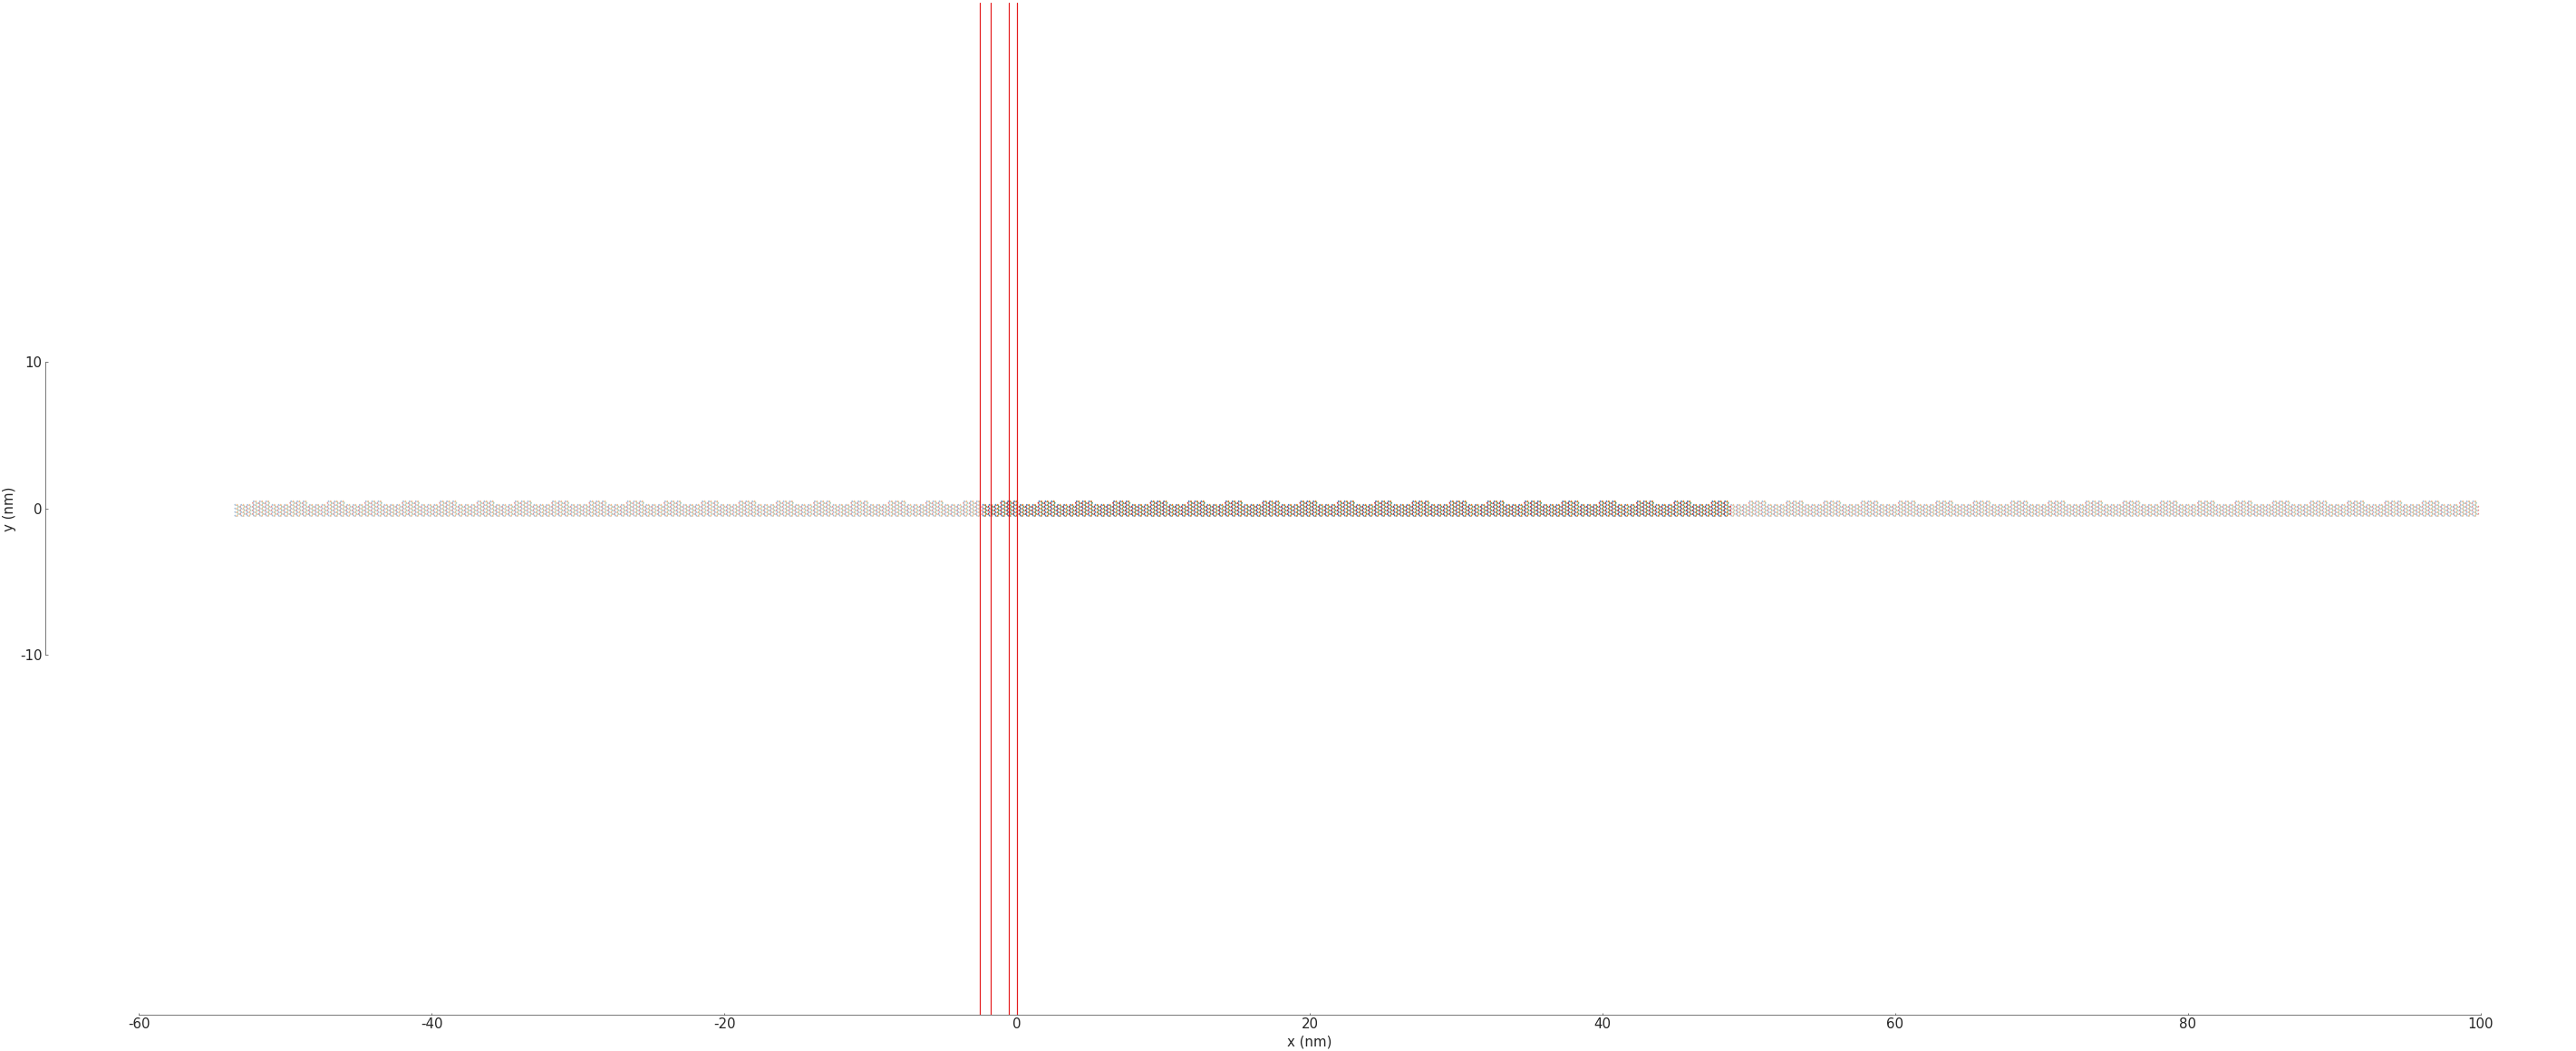

In [35]:
def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc_B = pb.rectangle(x=4*a, y=math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1)+1*a_cc,0])
    tr_rect_up_B = rect_exc_B.with_offset([2*a+leng*(T-1)+a_cc, math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_up_B

    return shape_1

supercell = shape(0)

print('How many supercell you want to make? +1을 해주세요')
inp = input() 


for i in range (0,int(inp)) :
    supercell += shape(i)
    
    
supercell.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_B = pb.Model(lattice, supercell, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_B.plot()
#arm_gra.shape.plot()

## Energy

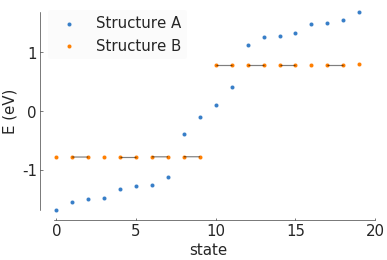

In [36]:
plt.plot(figsize=(25, 25))
solverA = pb.solver.arpack(arm_gra_A, k=20)  # for the 20 lowest energy eigenvalues
solverB = pb.solver.arpack(arm_gra_B, k=20)  # for the 20 lowest energy eigenvalues
eigenvaluesA = solverA.calc_eigenvalues()
eigenvaluesA.plot(label="Structure A")
eigenvaluesB = solverB.calc_eigenvalues()
eigenvaluesB.plot(label="Structure B", c='C4')

pb.pltutils.legend()

In [47]:
"""
eigenvalues = solver.calc_eigenvalues(map_probability_at=[0.1, 0.6])  # position in [nm]
eigenvalues.plot_heatmap(show_indices=True)
pb.pltutils.colorbar()"""

'\neigenvalues = solver.calc_eigenvalues(map_probability_at=[0.1, 0.6])  # position in [nm]\neigenvalues.plot_heatmap(show_indices=True)\npb.pltutils.colorbar()'

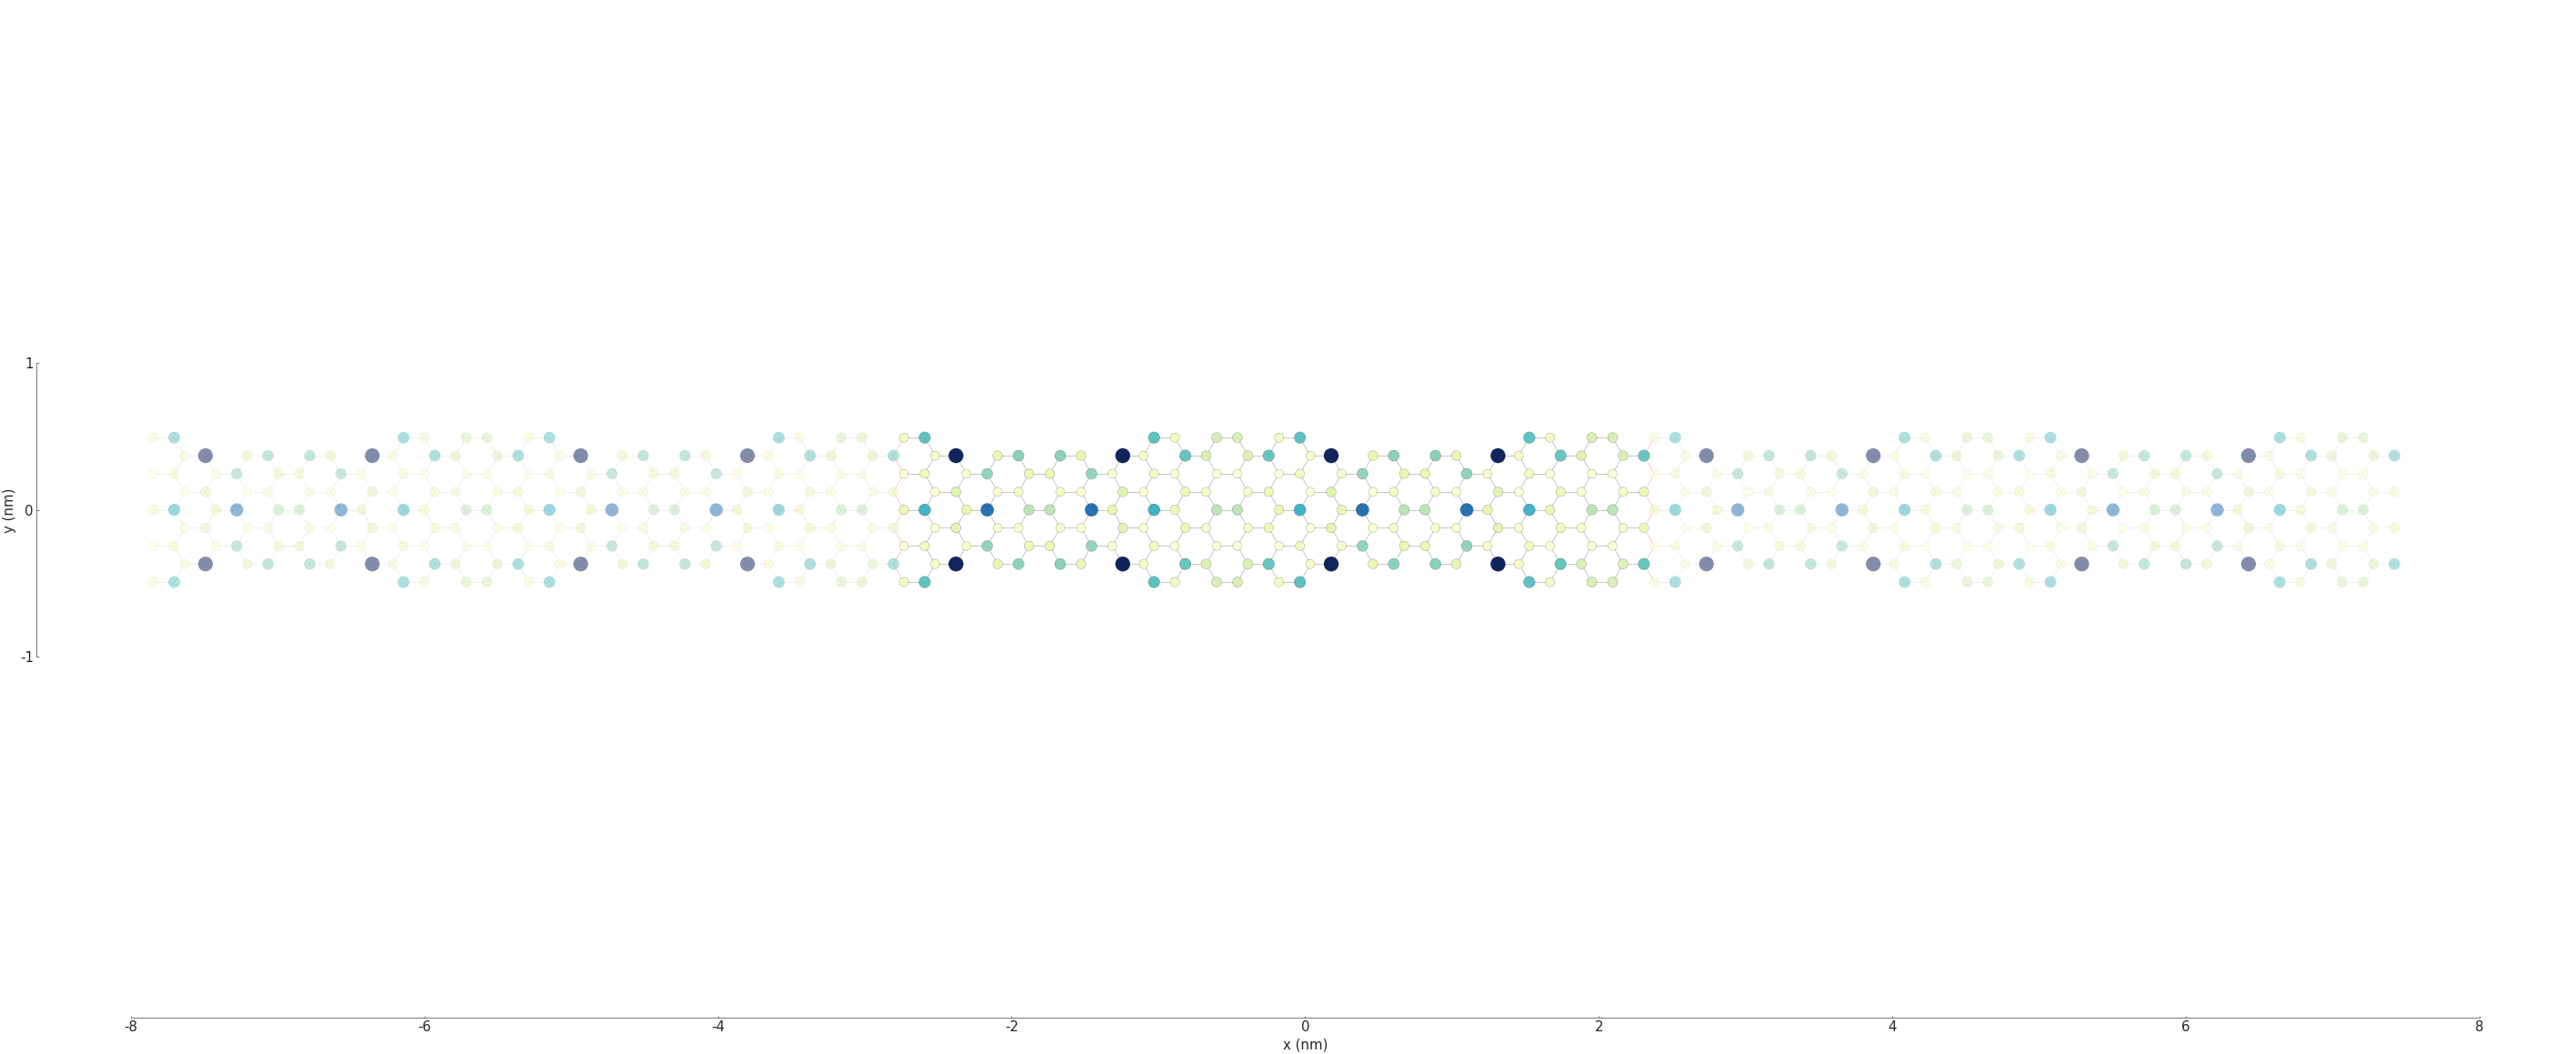

In [28]:
plt.figure(figsize=(50, 20.6))
probability_map = solverA.calc_probability(9)
probability_map.plot()

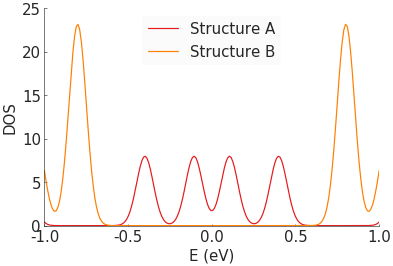

In [27]:
plt.plot(figsize=(25, 25))

dosA = solverA.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosA.plot(label="Structure A")

dosB = solverB.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosB.plot(label="Structure B", c='C4')


pb.pltutils.legend()

In [30]:
solverA = pb.solver.lapack(arm_gra_A)
solverB = pb.solver.lapack(arm_gra_B)

kx_lim = math.pi/leng*(int(inp)-1)
kx_path = np.linspace(-kx_lim,kx_lim,100)
ky_outer = 0
ky_inner = 2*np.pi / (3*graphene.a_cc)

outer_bandsA = []
for kx in kx_path :
    solverA.set_wave_vector([kx,ky_outer])
    outer_bandsA.append(solverA.eigenvalues)
    
inner_bandsA = []
for kx in kx_path :
    solverA.set_wave_vector([kx,ky_inner])
    inner_bandsA.append(solverA.eigenvalues)


In [37]:
outer_bandsB = []
for kx in kx_path :
    solverB.set_wave_vector([kx,ky_outer])
    outer_bandsB.append(solverB.eigenvalues)
    
inner_bandsB = []
for kx in kx_path :
    solverB.set_wave_vector([kx,ky_inner])
    inner_bandsB.append(solverB.eigenvalues)

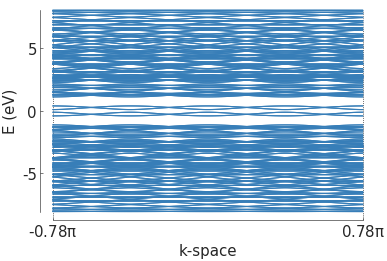

In [39]:
for bands in [outer_bandsA, inner_bandsA]:
    result = pb.results.Bands(kx_path, bands)
    result.plot()

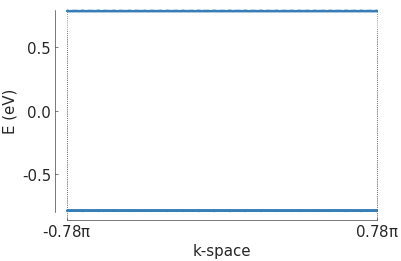

In [38]:
for bands in [outer_bandsB, inner_bandsB]:
    result = pb.results.Bands(kx_path, bands)
    result.plot()

## KPM_LDOS

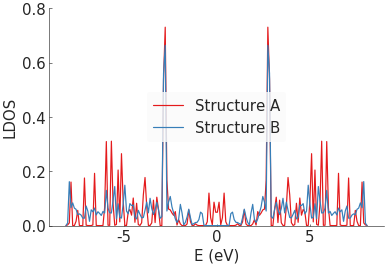

In [40]:
from pybinding.repository import graphene

kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)
ldosA = kpmA.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])
ldosB = kpmB.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.plot(figsize=(30, 30))
ldosA.plot(label="Structure A")
ldosB.plot(label="Structure B")





pb.pltutils.legend()

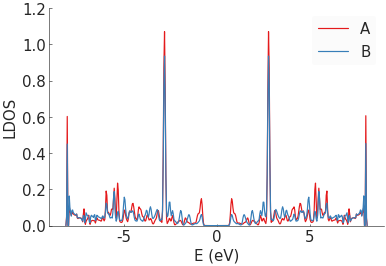

In [42]:
kpm = pb.kpm(arm_gra_B)

for sub_name in ["A", "B"]:
    ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 500), broadening=0.05,
                         position=[0, 0], sublattice=sub_name)
    ldos.plot(label=sub_name)
pb.pltutils.legend()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:06 / ETA: 0:00:00


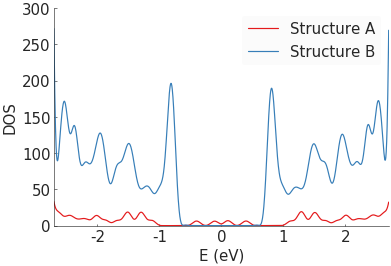

In [43]:
kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)

dosA = kpmA.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)
dosB = kpmB.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)


dosA.plot(label="Structure A")
dosB.plot(label="Structure B")

pb.pltutils.legend()

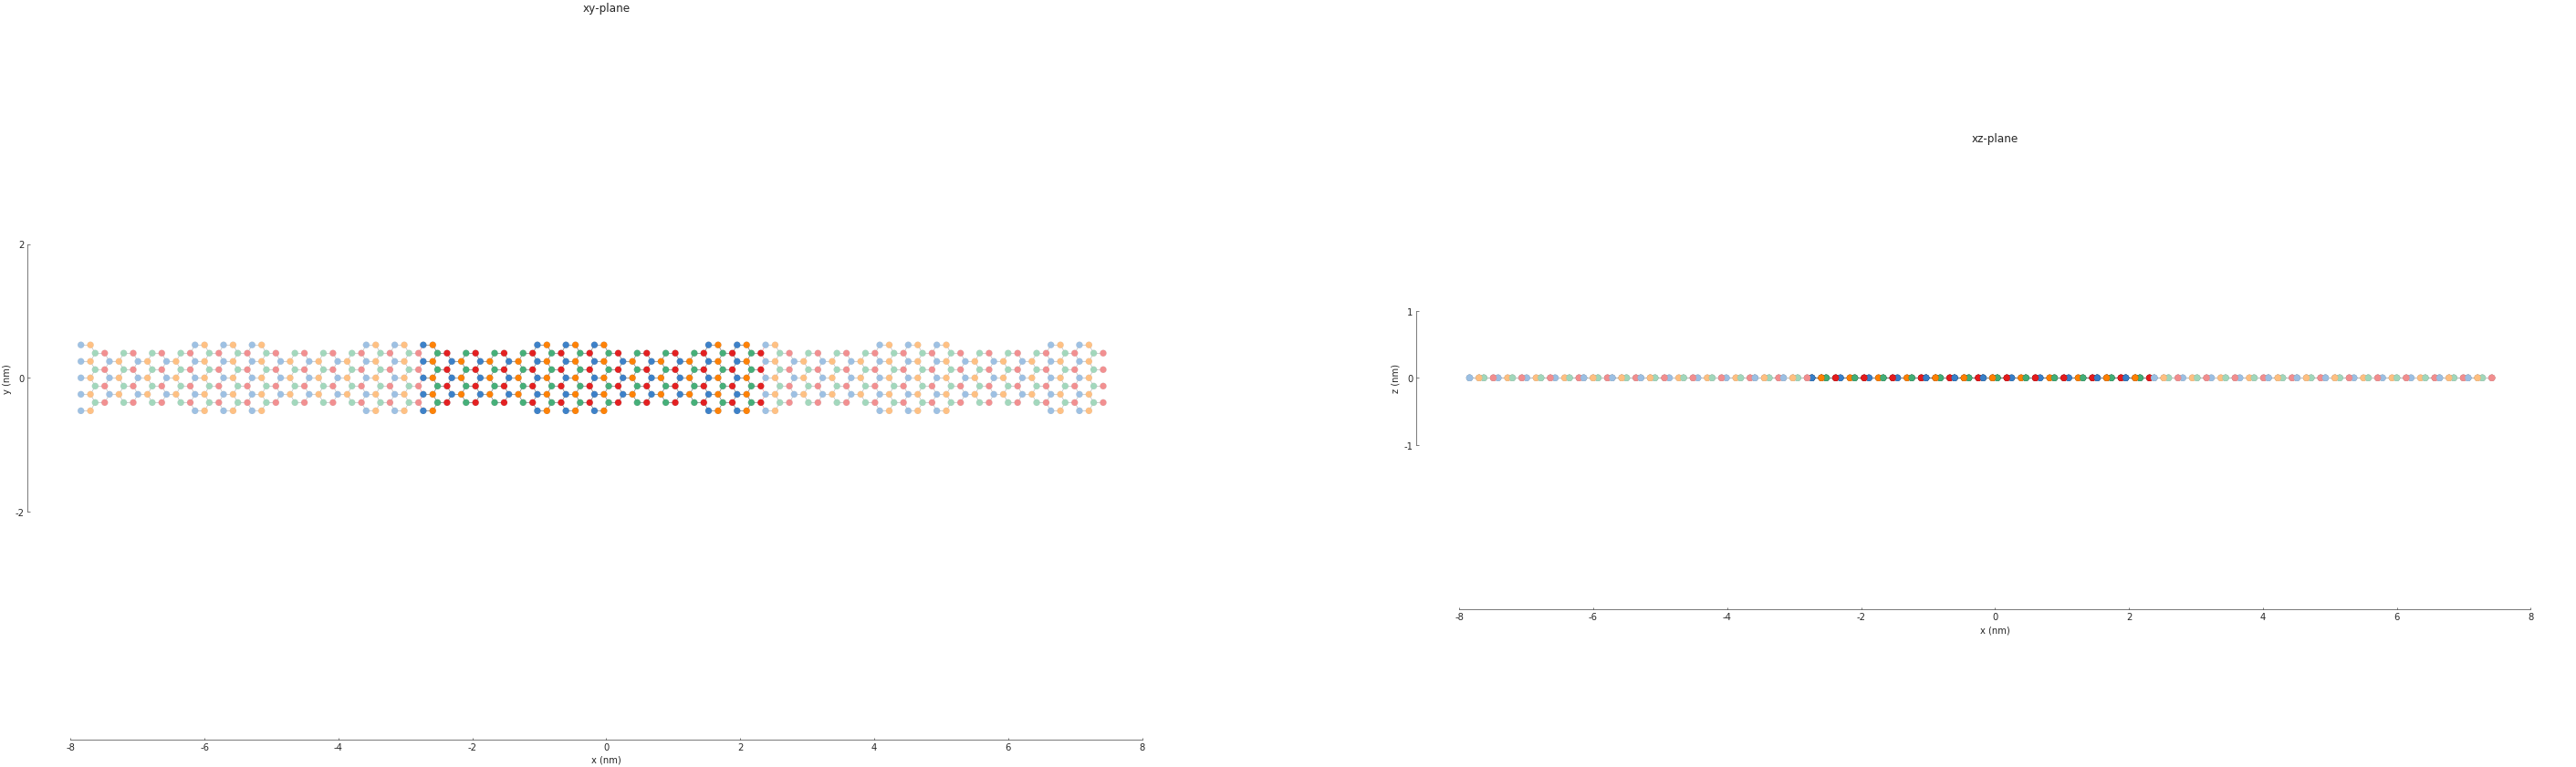

In [20]:
plt.figure(figsize=(50, 20.6))

def gaussian_bump_strain(height, sigma):
    """Out-of-plane deformation (bump)"""
    @pb.site_position_modifier
    def displacement(x, y, z):
        dz = height * np.exp(-(x**2 + y**2) / sigma**2)  # gaussian
        return x, y, z + dz  # only the height changes

    @pb.hopping_energy_modifier
    def strained_hoppings(energy, x1, y1, z1, x2, y2, z2):
        d = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)  # strained neighbor distance
        return energy * np.exp(-3.37 * (d / graphene.a_cc - 1))  # see strain section

    return displacement, strained_hoppings

#plt.figure(figsize=(6.7, 2.2))
plt.subplot(121, title="xy-plane", ylim=[-5, 5])
arm_gra.plot()
plt.subplot(122, title="xz-plane")
arm_gra.plot(axes="xz")

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:06 / ETA: 0:00:00


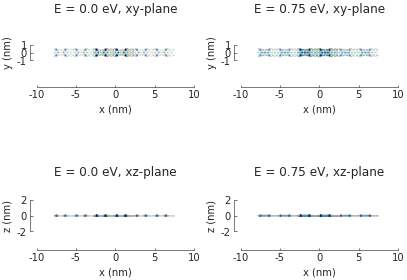

In [21]:
kpm = pb.kpm(arm_gra)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape=pb.circle(radius=2.8))  # only within the shape
plt.figure(figsize=(6.7, 6))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 0.75, 0.0, 0.75]  # eV
planes = ["xy", "xy", "xz", "xz"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


In [22]:
kpm = pb.kpm(arm_gra, kernel=pb.jackson_kernel())

# Construct a unit vector which is equal to 1 at the position
# where we want to calculate the local density of states
idx = model.system.find_nearest(position=[0, 0], sublattice="A")
alpha = np.zeros(model.hamiltonian.shape[0])
alpha[idx] = 1

# The broadening and the kernel determine the needed number of moments
a, b = kpm.scaling_factors
broadening = 0.05  # (eV)
num_moments = kpm.kernel.required_num_moments(broadening / a)

# Main calculation
moments = kpm.moments(num_moments, alpha)  # optionally also takes beta and an operator

# Reconstruct the LDOS function
energy = np.linspace(-8.42, 8.42, 200)
scaled_energy = (energy - b) / a
ns = np.arange(num_moments)
k = 2 / (a * np.pi * np.sqrt(1 - scaled_energy**2))
chebyshev = np.cos(ns * np.arccos(scaled_energy[:, np.newaxis]))
ldos = k * np.sum(moments.real * chebyshev, axis=1)

plt.plot(energy, ldos)
plt.xlabel("E (eV)")
plt.ylabel("LDOS")
pb.pltutils.despine()

RuntimeError: Size mismatch between the model Hamiltonian and the given argument 'alpha'

In [7]:
def mass_termy(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes suddenly
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy[y>=0] += V1
        energy[y<0] -= V1
        return energy
    
    return potential

In [8]:
def mass_termy_kink(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes gradually
    @pb.onsite_energy_modifier
    def potential(energy, sub_id,x,y):
        yrange=w3*3*(w1+w2)*graphene.a_cc/2
        energy[y>=yrange] += V1
        energy[(y<yrange)&(y>=-yrange)] += V1/(yrange)*y[(y<yrange)&(y>=-yrange)]
        energy[y<-yrange] -= V1
        return energy

    return potential

In [9]:
def mass_term_siny(V1,w1,w2,w3):
#potential equals to siny
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy += V1*sin(2*pi*y/(3*(w1+w2)*graphene.a_cc))
        return energy
    
    return potential


In [10]:
def energy():
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
    
    #normal
    model = pb.Model(lattice, supercell, pb.translational_symmetry(a1=18 ,a2=False))
    
    plt.subplot(231)
    solver = pb.solver.lapack(model)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-4*math.pi/a/a, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1,1)


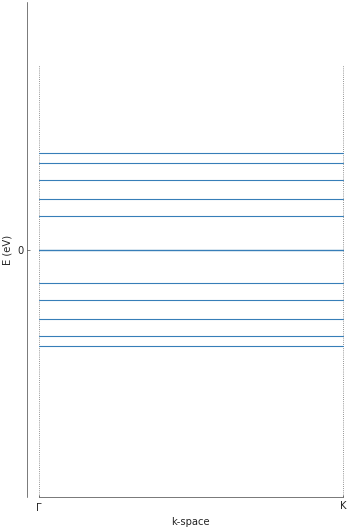

In [11]:
energy()

In [77]:
def zigzag(w1,w2,w3,w4,e1):
    #w1, w2 is width of each area on the potential changing direction
    #w3 is only for kink, it determines the width of gradual changing area
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
    
    
    #normal
    model = pb.Model(
        monolayer_4atomy(),
        pb.rectangle(2*w4*graphene.a_cc, 3*(w1+w2)*graphene.a),
        pb.translational_symmetry(a1=w4*graphene.a, a2=3*(w1+w2)*graphene.a_cc),
        mass_termy(e1,w1,w2,w3)
    )
    
    plt.subplot(231)
    solver = pb.solver.lapack(model)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-4*pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1,1)

#    model shape    
    plt.subplot(234)
    model.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")
    
    
    #sin
    model = pb.Model(
        monolayer_4atomy(),
        pb.rectangle(2*w4*graphene.a_cc, 3*(w1+w2)*graphene.a),
        pb.translational_symmetry(a1=w4*graphene.a, a2=3*(w1+w2)*graphene.a_cc),
        mass_term_siny(e1,w1,w2,w3)
    )
    
    plt.subplot(232)
    solver = pb.solver.lapack(model)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-4*pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1,1)

#    model shape    
    plt.subplot(235)
    model.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")  
    
    #kink
    model = pb.Model(
        monolayer_4atomy(),
        pb.rectangle(2*w4*graphene.a_cc, 3*(w1+w2)*graphene.a),
        pb.translational_symmetry(a1=w4*graphene.a, a2=3*(w1+w2)*graphene.a_cc),
        mass_termy_kink(e1,w1,w2,w3)
    )
    
    plt.subplot(233)
    solver = pb.solver.lapack(model)
    eigenvalues = solver.eigenvalues
    
    
    a_cc = graphene.a_cc
    Gamma = [-4*pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1,1)

#    model shape    
    plt.subplot(236)
    model.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")

In [79]:

zigzag(2,2,0.5,2,1*0.066*math.pi)

NameError: name 'monolayer_4atomy' is not defined

In [ ]:
from IPython.display import display, HTML